### Income Dataset
#### Perform Binary Classification to predict if Salary is greater than $50K

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/income.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
df.duplicated().sum()

45

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

#### Age; age of the person

<Axes: xlabel='age', ylabel='Count'>

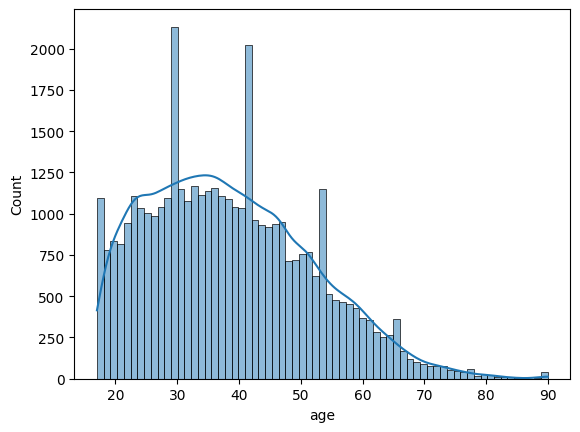

In [9]:
sns.histplot(x=df.age,kde=True)

<Axes: xlabel='age', ylabel='Count'>

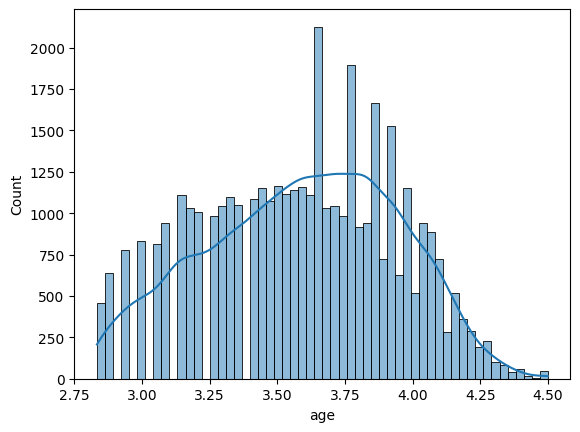

In [10]:
sns.histplot(x=np.log(df.age),kde=True)

<Axes: xlabel='age'>

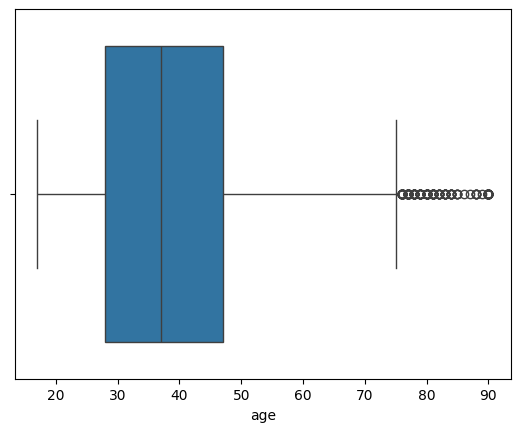

In [11]:
# we can observe that the column has some outliers
sns.boxplot(x=df.age)

#### Workclass; type of job

In [12]:
df.workclass.value_counts()

workclass
Private             30018
Self-emp-not-inc     3403
Local-gov            2792
State-gov            1721
Self-emp-inc         1470
Federal-gov          1262
Without-pay            20
Name: count, dtype: int64

In [13]:
df = df[df.workclass != 'Without-pay']

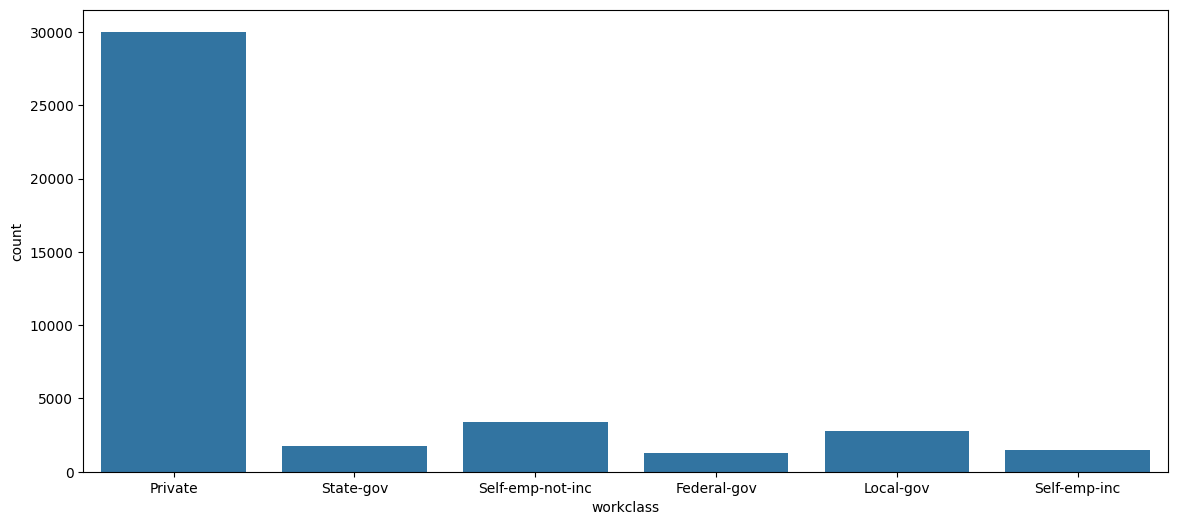

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(x=df.workclass)
plt.show()

#### fnlwgt; final weight> provide an estimate of the number of people in the population that a given survey respondent represents

<Axes: xlabel='fnlwgt', ylabel='Count'>

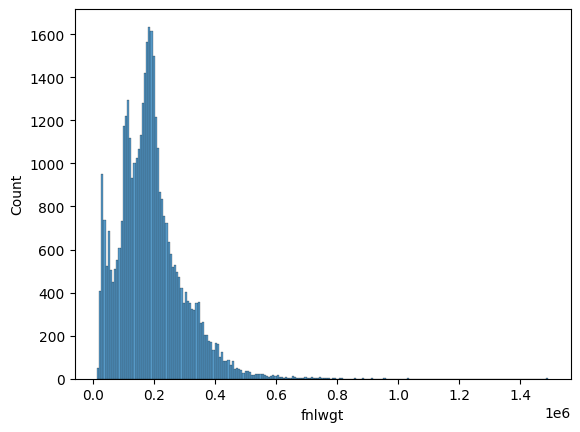

In [15]:
sns.histplot(x=df.fnlwgt)

<Axes: xlabel='fnlwgt', ylabel='Count'>

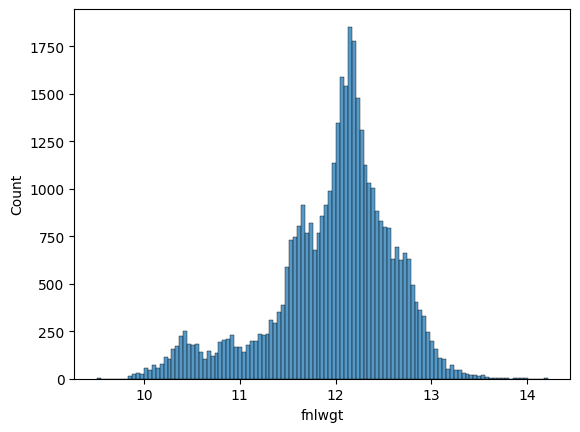

In [16]:
sns.histplot(x=np.log(df.fnlwgt))

<Axes: xlabel='fnlwgt'>

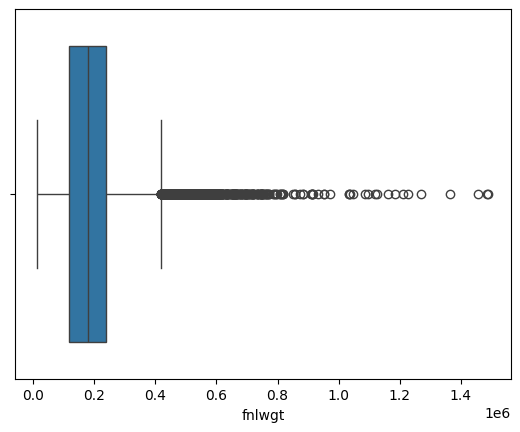

In [17]:
# we can see that the data has outliers
sns.boxplot(x=df.fnlwgt)

#### Education

In [18]:
df.education.value_counts()

education
HS-grad         13286
Some-college     8894
Bachelors        6803
Masters          2266
Assoc-voc        1739
11th             1481
Assoc-acdm       1358
10th             1098
7th-8th           737
Prof-school       706
9th               615
12th              519
Doctorate         489
5th-6th           411
1st-4th           200
Preschool          64
Name: count, dtype: int64

#### Let's shorten the education category

In [19]:
def shorten_cat(categories,cuttoff):
    map = {}
    for i in range(len(categories)):
        if categories.values[i] >=cuttoff:
            map[categories.index[i]] = categories.index[i]
        else:
            map[categories.index[i]] = 'Other'
    return map

In [20]:
df['education'] = df['education'].map(shorten_cat(df['education'].value_counts(),1000))
df = df[df.education != 'Other']
df.education.value_counts()

education
HS-grad         13286
Some-college     8894
Bachelors        6803
Masters          2266
Assoc-voc        1739
11th             1481
Assoc-acdm       1358
10th             1098
Name: count, dtype: int64

#### Marital status

In [21]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       16894
Never-married            12162
Divorced                  5310
Separated                 1131
Widowed                    987
Married-spouse-absent      416
Married-AF-spouse           25
Name: count, dtype: int64

<Axes: xlabel='marital-status', ylabel='count'>

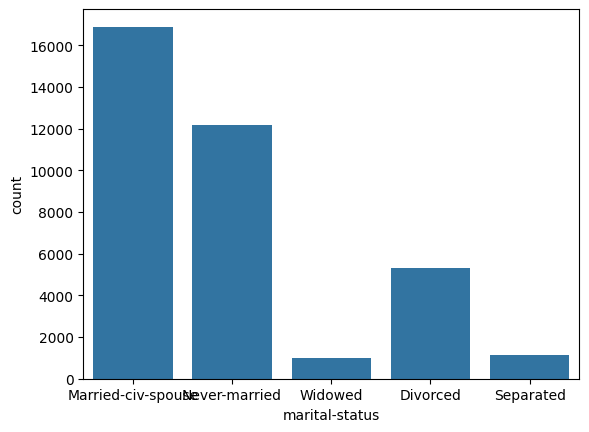

In [22]:
df['marital-status'] = df['marital-status'].map(shorten_cat(df['marital-status'].value_counts(),500))
df = df[df['marital-status'] != 'Other']
sns.countplot(x=df['marital-status'])

#### Occupation

In [23]:
df['occupation'] = df['occupation'].map(shorten_cat(df['occupation'].value_counts(),1000))
df = df[df['occupation'] != 'Other']
df.occupation.value_counts()

occupation
Exec-managerial      5165
Craft-repair         4915
Adm-clerical         4743
Sales                4631
Prof-specialty       4332
Other-service        3763
Machine-op-inspct    2250
Transport-moving     1824
Handlers-cleaners    1580
Tech-support         1260
Farming-fishing      1040
Name: count, dtype: int64

#### Relaionship

In [24]:
df.relationship.value_counts()

relationship
Husband           14434
Not-in-family      9253
Own-child          5414
Unmarried          3739
Wife               1705
Other-relative      958
Name: count, dtype: int64

#### Race

In [25]:
df.race.value_counts()

race
White                 30675
Black                  3273
Asian-Pac-Islander      977
Amer-Indian-Eskimo      349
Other                   229
Name: count, dtype: int64

#### Gender

In [26]:
df.gender.value_counts()

gender
Male      23651
Female    11852
Name: count, dtype: int64

<Axes: xlabel='race', ylabel='count'>

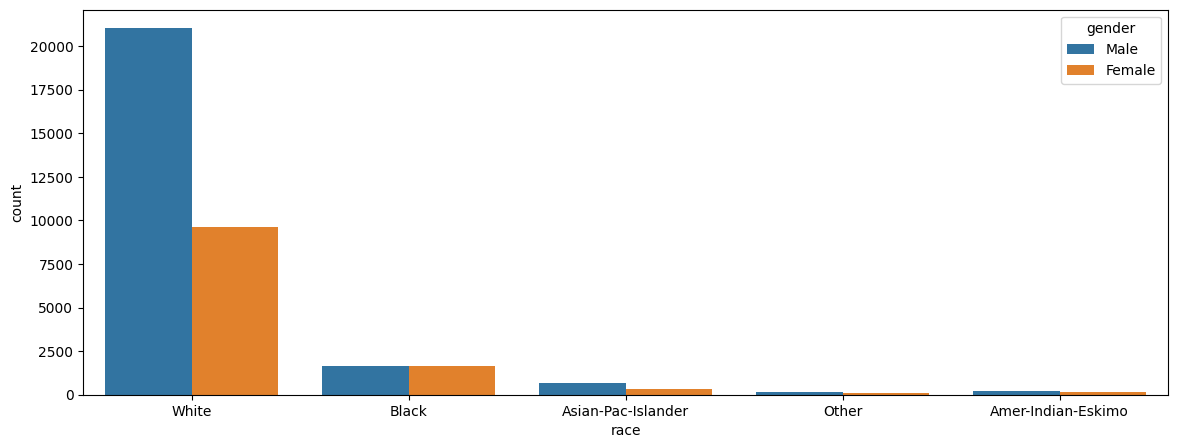

In [27]:
plt.figure(figsize=(14,5))
sns.countplot(x=df.race,hue=df.gender)

#### capital gain

In [28]:
print(f"The maximum profit made from selling an asset is: {df['capital-gain'].max()}")
print(f"The minimum profit made from selling an asset is: {df['capital-gain'].min()}")

The maximum profit made from selling an asset is: 99999
The minimum profit made from selling an asset is: 0


<Axes: xlabel='capital-gain', ylabel='Count'>

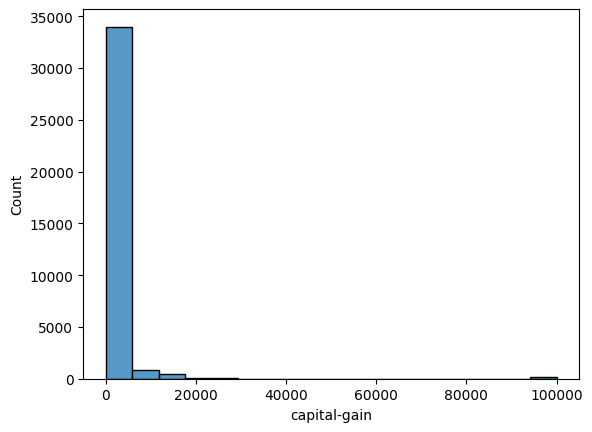

In [29]:
sns.histplot(x=df['capital-gain'])

<Axes: xlabel='capital-gain'>

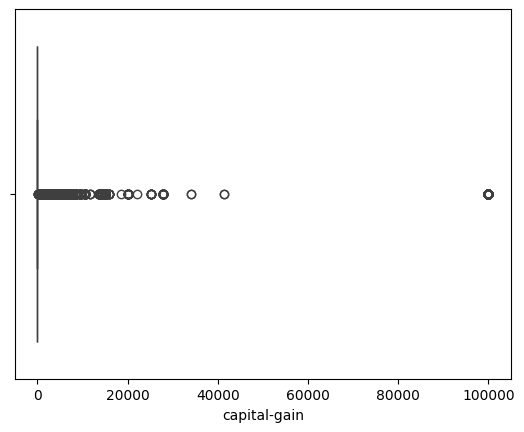

In [30]:
sns.boxplot(x=df['capital-gain'])

In [31]:
df.drop(['capital-loss', 'fnlwgt','hours-per-week', 'native-country'],axis=1,inplace=True)

<Axes: xlabel='income_>50K', ylabel='count'>

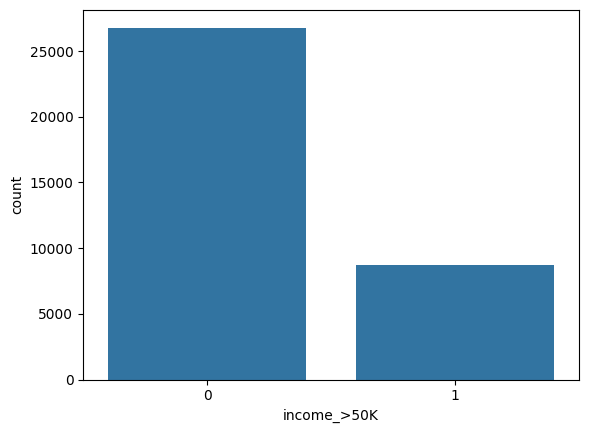

In [32]:
sns.countplot(x=df['income_>50K'])

#### Let's remove outliers

In [34]:
columns = ['age']
print(f"Shape of data with outliers: {df.shape}")
for col in columns:
    upper_bound = df[col].mean() + (2*df[col].std())
    lower_bound = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    
print(f"Shape of data without outliers: {df.shape}")

Shape of data with outliers: (34237, 11)
Shape of data without outliers: (33551, 11)


In [35]:
df['income_>50K'].value_counts()

income_>50K
0    25341
1     8210
Name: count, dtype: int64

#### Undersampling the data

In [36]:
class_count_0,class_count_1 = df['income_>50K'].value_counts()

class_0 = df[df['income_>50K'] == 0]
class_1 = df[df['income_>50K'] == 1]

print(class_0.shape)
print(class_1.shape)

class_0_under = class_0.sample(class_count_1)

df = pd.concat([class_0_under,class_1])

(25341, 11)
(8210, 11)


In [37]:
df['income_>50K'].value_counts()

income_>50K
0    8210
1    8210
Name: count, dtype: int64

In [38]:
df.drop(['capital-gain','educational-num'],axis=1,inplace=True)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,income_>50K
0,32,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,1
1,38,Private,11th,Married-civ-spouse,Sales,Husband,White,Male,0
2,50,Private,Masters,Married-civ-spouse,Sales,Husband,White,Male,1
3,45,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,1
4,24,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Female,0


In [39]:
df.gender = df.gender.map({'Male':1,'Female':0})

In [40]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
encoder = OneHotEncoder()
cols = ['workclass','education', 'marital-status', 'occupation', 'relationship', 'race']
scale_cols = ['age']
enc_pipe = Pipeline(steps=[
    ('encoder',OneHotEncoder())
])
sc_pipe = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

preprocessor = ColumnTransformer([
    ('enc_pipe',enc_pipe,cols),
    ('sc_pipe',sc_pipe,scale_cols)
])

In [42]:
X = df.drop('income_>50K',axis=1)
y = df['income_>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [43]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [44]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Learning rate set to 0.030099
0:	learn: 0.6752703	total: 3.09s	remaining: 51m 25s
1:	learn: 0.6582922	total: 3.1s	remaining: 25m 45s
2:	learn: 0.6424220	total: 3.11s	remaining: 17m 12s
3:	learn: 0.6293361	total: 3.11s	remaining: 12m 55s
4:	learn: 0.6168613	total: 3.12s	remaining: 10m 21s
5:	learn: 0.6045808	total: 3.13s	remaining: 8m 38s
6:	learn: 0.5926652	total: 3.14s	remaining: 7m 25s
7:	learn: 0.5831394	total: 3.15s	remaining: 6m 30s
8:	learn: 0.5727086	total: 3.16s	remaining: 5m 47s
9:	learn: 0.5637268	total: 3.17s	remaining: 5m 13s
10:	learn: 0.5554280	total: 3.18s	remaining: 4m 45s
11:	learn: 0.5491753	total: 3.18s	remaining: 4m 22s
12:	learn: 0.5435845	total: 3.19s	remaining: 4m 2s
13:	learn: 0.5371784	total: 3.2s	remaining: 3m 45s
14:	learn: 0.5318106	total: 3.21s	remaining: 3m 30s
15:	learn: 0.5261041	total: 3.22s	remaining: 3m 18s
16:	learn: 0.5203839	total: 3.23s	remaining: 3m 6s
17:	learn: 0.5153374	total: 3.24s	remaining: 2m 56s
18:	learn: 0.5107764	total: 3.25s	remaining

In [45]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,income_>50K
0,32,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,1,1
1,38,Private,11th,Married-civ-spouse,Sales,Husband,White,1,0
2,50,Private,Masters,Married-civ-spouse,Sales,Husband,White,1,1
3,45,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,1,1
4,24,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,White,0,0


In [46]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/processed_data.csv',index=False)